In [1]:
import numpy as np
import editdistance
import pandas as pd
import seaborn as sn
import tensorflow as tf
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def get_model(input_dim, output_dim):
    model = tf.keras.Sequential()

    model.add(tf.keras.layers.Dense(
        256, activation='relu', use_bias=True, 
        kernel_initializer='he_uniform', input_dim=input_dim
    ))
    model.add(tf.keras.layers.Dense(
        256, activation='relu', use_bias=True, kernel_initializer='he_uniform'
    ))
    model.add(tf.keras.layers.Dense(
        256, activation='relu', use_bias=True, kernel_initializer='he_uniform'
    ))
    model.add(tf.keras.layers.Dense(
        output_dim, activation='softmax', use_bias=True, kernel_initializer='glorot_uniform'
    ))
    model.compile(optimizer='sgd', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
    return model

def get_y_label(labels, state_list):
    y = np.zeros(labels.shape)
    for i in range(len(state_list)):
        y[labels==state_list[i]] = i
    return y

def plot_trian_val(train_values, val_values, name):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    x = np.arange(0, len(train_values))
    ax.plot(train_values, color='red')
    ax.plot(val_values, color='blue')
    ax.set_xlabel('epochs')
    ax.set_title(name)
    
def merge_state2phoneme(states):
    current_state = ''
    new_states = []
    for s in states:
        ph = s[:-2]
        if ph!=current_state:
            current_state = ph
            new_states.append(ph)
    return new_states

def merge_same_states(states):
    current_state = ''
    new_states = []
    for s in states:
        if s!=current_state:
            current_state = s
            new_states.append(s)
    return new_states

# perpare label

In [3]:
stateList = np.load('stateList.npy', allow_pickle=True)
training_label = np.load('train_norm_label_labels.npy', allow_pickle=True)
val_label = np.load('val_norm_label_labels.npy', allow_pickle=True)
test_label = np.load('test_norm_label_labels.npy', allow_pickle=True)

train_y = get_y_label(training_label, stateList)
val_y = get_y_label(val_label, stateList)
test_y = get_y_label(test_label, stateList)
print(training_label.shape)
print(val_label.shape)
print(test_label.shape)
print(training_label[:10])

(1338247,)
(169145,)
(1527014,)
['sil_0' 'sil_1' 'sil_1' 'sil_1' 'sil_1' 'sil_1' 'sil_1' 'sil_1' 'sil_1'
 'sil_1']


In [4]:
output_dim = len(stateList)
train_y = tf.keras.utils.to_categorical(train_y, output_dim)
val_y = tf.keras.utils.to_categorical(val_y, output_dim)
test_y = tf.keras.utils.to_categorical(test_y, output_dim)
print(train_y.shape)
print(val_y.shape)
print(test_y.shape)
print(output_dim)

(1338247, 61)
(169145, 61)
(1527014, 61)
61


# case1: lmfcc without dynamic features

In [5]:
train_data = np.load('train_norm_feature_lmfcc.npy', allow_pickle=True)
val_data = np.load('val_norm_feature_lmfcc.npy', allow_pickle=True)
input_dim = train_data.shape[1]
model1 = get_model(input_dim, output_dim)
history = model1.fit(train_data, train_y, validation_data=(val_data, val_y), epochs=80, batch_size=128)
model1.save("model1.h5")

Epoch 1/80
10456/10456 [==============================] - 21s 2ms/step - loss: 1.4397 - accuracy: 0.5738 - val_loss: 1.3721 - val_accuracy: 0.5796
Epoch 2/80
10456/10456 [==============================] - 20s 2ms/step - loss: 1.2568 - accuracy: 0.6135 - val_loss: 1.3801 - val_accuracy: 0.5608
Epoch 3/80
10456/10456 [==============================] - 20s 2ms/step - loss: 1.2078 - accuracy: 0.6265 - val_loss: 1.2823 - val_accuracy: 0.6021
Epoch 4/80
10456/10456 [==============================] - 20s 2ms/step - loss: 1.1787 - accuracy: 0.6342 - val_loss: 1.2594 - val_accuracy: 0.6122
Epoch 5/80
10456/10456 [==============================] - 20s 2ms/step - loss: 1.1598 - accuracy: 0.6396 - val_loss: 1.3485 - val_accuracy: 0.5235
Epoch 6/80
10456/10456 [==============================] - 20s 2ms/step - loss: 1.1455 - accuracy: 0.6430 - val_loss: 1.3436 - val_accuracy: 0.5928
Epoch 7/80
10456/10456 [==============================] - 20s 2ms/step - loss: 1.1340 - accuracy: 0.6466 - val_loss: 1

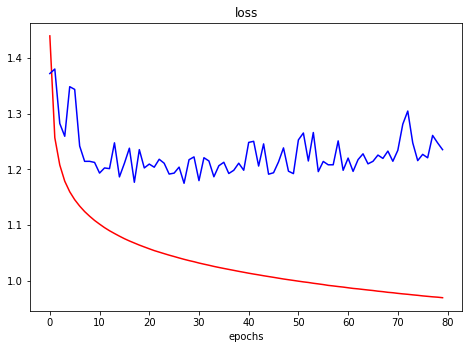

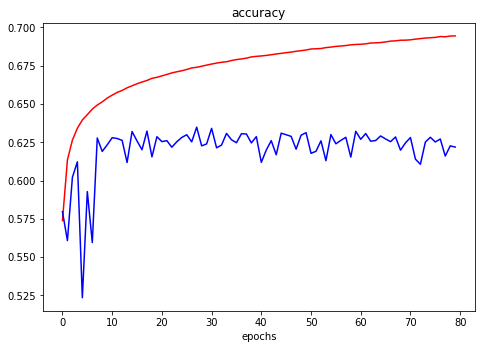

In [6]:
plot_trian_val(history.history['loss'], history.history['val_loss'], 'loss')
plot_trian_val(history.history['accuracy'], history.history['val_accuracy'], 'accuracy')

# case2: mspec without dynamic features

In [7]:
train_data = np.load('train_norm_feature_mspec.npy', allow_pickle=True)
val_data = np.load('val_norm_feature_mspec.npy', allow_pickle=True)
input_dim = train_data.shape[1]
model2 = get_model(input_dim, output_dim)
history = model2.fit(train_data, train_y, validation_data=(val_data, val_y), epochs=80, batch_size=128)
model2.save("model2.h5")

Epoch 1/80
10456/10456 [==============================] - 19s 2ms/step - loss: 1.5297 - accuracy: 0.5484 - val_loss: 1.4069 - val_accuracy: 0.5751
Epoch 2/80
10456/10456 [==============================] - 19s 2ms/step - loss: 1.3054 - accuracy: 0.6014 - val_loss: 1.4673 - val_accuracy: 0.5608
Epoch 3/80
10456/10456 [==============================] - 19s 2ms/step - loss: 1.2437 - accuracy: 0.6176 - val_loss: 1.3676 - val_accuracy: 0.5885
Epoch 4/80
10456/10456 [==============================] - 19s 2ms/step - loss: 1.2057 - accuracy: 0.6278 - val_loss: 1.2669 - val_accuracy: 0.6085
Epoch 5/80
10456/10456 [==============================] - 19s 2ms/step - loss: 1.1795 - accuracy: 0.6346 - val_loss: 1.2362 - val_accuracy: 0.6160
Epoch 6/80
10456/10456 [==============================] - 19s 2ms/step - loss: 1.1592 - accuracy: 0.6404 - val_loss: 1.2552 - val_accuracy: 0.6186
Epoch 7/80
10456/10456 [==============================] - 19s 2ms/step - loss: 1.1426 - accuracy: 0.6448 - val_loss: 1

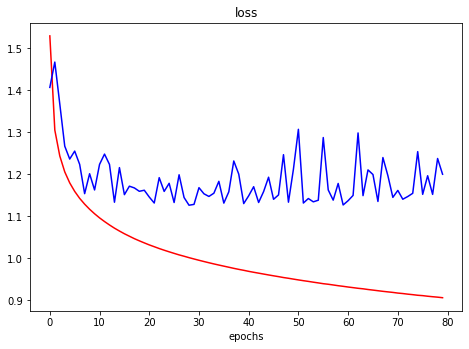

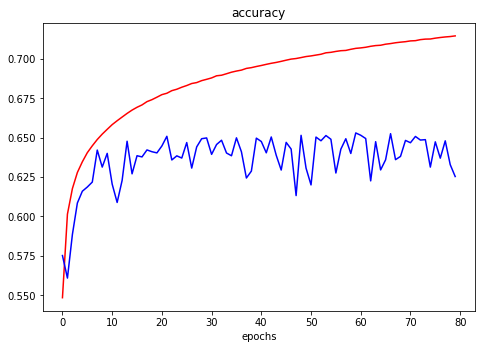

In [8]:
plot_trian_val(history.history['loss'], history.history['val_loss'], 'loss')
plot_trian_val(history.history['accuracy'], history.history['val_accuracy'], 'accuracy')

# case3: mfcc with dynamic features

In [9]:
train_data = np.load('train_norm_feature_dylmfcc.npy', allow_pickle=True)
val_data = np.load('val_norm_feature_dylmfcc.npy', allow_pickle=True)
input_dim = train_data.shape[1]
model3 = get_model(input_dim, output_dim)
history = model3.fit(train_data, train_y, validation_data=(val_data, val_y), epochs=80, batch_size=128)
model3.save("model3.h5")

Epoch 1/80
10456/10456 [==============================] - 20s 2ms/step - loss: 1.0989 - accuracy: 0.6638 - val_loss: 0.9162 - val_accuracy: 0.7070
Epoch 2/80
10456/10456 [==============================] - 20s 2ms/step - loss: 0.8243 - accuracy: 0.7339 - val_loss: 0.8322 - val_accuracy: 0.7344
Epoch 3/80
10456/10456 [==============================] - 20s 2ms/step - loss: 0.7538 - accuracy: 0.7548 - val_loss: 0.7945 - val_accuracy: 0.7419
Epoch 4/80
10456/10456 [==============================] - 20s 2ms/step - loss: 0.7114 - accuracy: 0.7672 - val_loss: 0.7560 - val_accuracy: 0.7544
Epoch 5/80
10456/10456 [==============================] - 20s 2ms/step - loss: 0.6815 - accuracy: 0.7761 - val_loss: 0.7195 - val_accuracy: 0.7665
Epoch 6/80
10456/10456 [==============================] - 19s 2ms/step - loss: 0.6585 - accuracy: 0.7831 - val_loss: 0.9892 - val_accuracy: 0.6520
Epoch 7/80
10456/10456 [==============================] - 19s 2ms/step - loss: 0.6399 - accuracy: 0.7885 - val_loss: 0

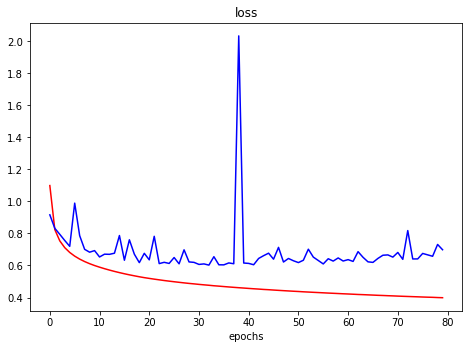

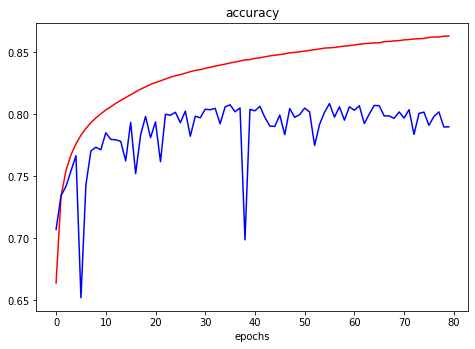

In [10]:
plot_trian_val(history.history['loss'], history.history['val_loss'], 'loss')
plot_trian_val(history.history['accuracy'], history.history['val_accuracy'], 'accuracy')

# case4: mspec with dynamic features

In [11]:
train_data = np.load('train_norm_feature_dymspec.npy', allow_pickle=True)
val_data = np.load('val_norm_feature_dymspec.npy', allow_pickle=True)
input_dim = train_data.shape[1]
model4 = get_model(input_dim, output_dim)
history = model4.fit(train_data, train_y, validation_data=(val_data, val_y), epochs=80, batch_size=128)
model4.save("model4.h5")

Epoch 1/80
10456/10456 [==============================] - 20s 2ms/step - loss: 1.0924 - accuracy: 0.6630 - val_loss: 0.9246 - val_accuracy: 0.7042
Epoch 2/80
10456/10456 [==============================] - 20s 2ms/step - loss: 0.8152 - accuracy: 0.7365 - val_loss: 0.8489 - val_accuracy: 0.7278
Epoch 3/80
10456/10456 [==============================] - 20s 2ms/step - loss: 0.7482 - accuracy: 0.7559 - val_loss: 0.7791 - val_accuracy: 0.7455
Epoch 4/80
10456/10456 [==============================] - 20s 2ms/step - loss: 0.7081 - accuracy: 0.7679 - val_loss: 1.0238 - val_accuracy: 0.6860
Epoch 5/80
10456/10456 [==============================] - 20s 2ms/step - loss: 0.6796 - accuracy: 0.7764 - val_loss: 0.7362 - val_accuracy: 0.7610
Epoch 6/80
10456/10456 [==============================] - 19s 2ms/step - loss: 0.6579 - accuracy: 0.7827 - val_loss: 0.7107 - val_accuracy: 0.7680
Epoch 7/80
10456/10456 [==============================] - 20s 2ms/step - loss: 0.6400 - accuracy: 0.7879 - val_loss: 0

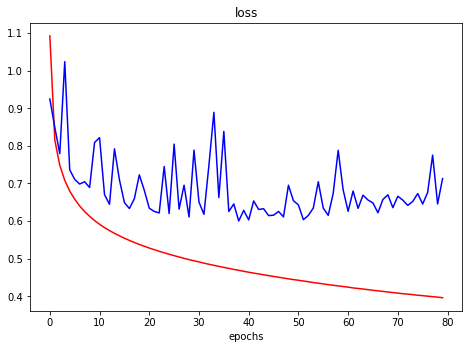

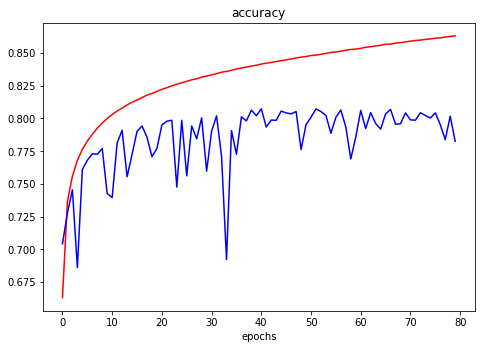

In [12]:
plot_trian_val(history.history['loss'], history.history['val_loss'], 'loss')
plot_trian_val(history.history['accuracy'], history.history['val_accuracy'], 'accuracy')

# Detailed Evaluation

In [5]:
test_data = np.load('test_norm_feature_lmfcc.npy', allow_pickle=True)
model1 = tf.keras.models.load_model('model1.h5')
predict_y = model1.predict(test_data)
predict_y_label = np.argmax(predict_y, axis=-1)
test_y = [stateList[x] for x in predict_y_label]

label_test_y = np.load('test_norm_label_labels.npy')
print(len(test_y))
print(len(label_test_y))

1527014
1527014


## 5.1 count correct frames

In [6]:
np.where(label_test_y==test_y)[0].shape

(910128,)

In [7]:
1163003/1527014

0.7616190814229601

## 5.2 merge all states the correspond to the same phoneme

In [8]:
mini_test_y = test_y[:100000]
mini_label_test_y = label_test_y[:100000]
merged_y = merge_state2phoneme(mini_test_y)
merged_label_y =merge_state2phoneme(mini_label_test_y)
print(merged_y[:100])

['sil', 'ow', 'sil', 't', 'sil', 't', 'sil', 'w', 'ao', 'ow', 'ao', 'n', 'w', 'ao', 'w', 'ow', 'n', 'w', 'ao', 'w', 'ah', 'v', 'ah', 'v', 'n', 'v', 'sil', 't', 'w', 'ao', 'ah', 'n', 'ah', 'n', 'sil', 'f', 's', 'th', 'k', 's', 't', 'v', 'r', 'ay', 'ah', 'th', 'ah', 'ow', 'ah', 'r', 'th', 'ah', 'v', 'ah', 'ow', 'ao', 'ow', 'n', 'sil', 'w', 'ah', 'ow', 'ah', 'n', 'ah', 'n', 'f', 'sil', 'f', 'k', 'f', 'sil', 'ow', 'ah', 'ay', 'ow', 'r', 'ah', 'v', 'f', 'sil', 'ah', 'ow', 'ah', 'ay', 'ow', 'ay', 'ow', 'r', 'v', 'n', 'v', 'f', 'v', 'sil', 'w', 'ow', 'w', 'ah', 'n']


## 5.3 edit distance at state level

In [9]:
merged_identical_y = merge_same_states(mini_test_y)
print(merged_identical_y[:20])
print(len(merged_identical_y))

['sil_1', 'sil_0', 'ow_2', 'sil_0', 'sil_1', 'sil_2', 't_1', 'sil_2', 'sil_0', 'sil_1', 't_0', 'sil_0', 'w_1', 'ao_0', 'ao_1', 'ow_1', 'ao_2', 'n_0', 'n_1', 'n_0']
34777


In [10]:
merged_identical_label_y = merge_same_states(mini_label_test_y)
print(merged_identical_label_y[:20])
print(len(merged_identical_label_y))

['sil_0', 'sil_1', 'sil_2', 'w_0', 'w_1', 'w_2', 'ah_0', 'ah_1', 'ah_2', 'n_0', 'n_1', 'n_2', 'w_0', 'w_1', 'w_2', 'ah_0', 'ah_1', 'ah_2', 'n_0', 'n_1']
21364


In [11]:
per = editdistance.eval(merged_identical_label_y, merged_identical_y)/len(merged_identical_y)
print('phone error rate at state level:', per)

phone error rate at state level: 0.6619604911291945


## 5.4 edit distance at phoneme level

In [12]:
ph_per = editdistance.eval(merged_y, merged_label_y)/len(merged_y)
print('phone error rate at phoneme level:', ph_per)

phone error rate at phoneme level: 0.7388630944911532


## 5.5 confusion matrices at state level

In [13]:
from sklearn.metrics import confusion_matrix

In [14]:
print(label_test_y[:10])

['sil_0' 'sil_1' 'sil_1' 'sil_1' 'sil_1' 'sil_1' 'sil_1' 'sil_1' 'sil_1'
 'sil_1']


In [15]:
c_matrix = confusion_matrix(label_test_y, test_y, labels=stateList)
print(c_matrix)

[[12089   269   204 ...     3     0     0]
 [ 1752  4971   451 ...     2     0     1]
 [  468   214  5142 ...     8     0     2]
 ...
 [    3     1    52 ...  1410   461   451]
 [    0     0     0 ...   216  9222   642]
 [    0     0     2 ...   150   677  8591]]


In [ ]:
c_matrix = np.log(c_matrix+1)   # using log(x+1) is only for better visualization
#  reference: https://www.kaggle.com/agungor2/various-confusion-matrix-plots
df_cm = pd.DataFrame(c_matrix, columns=stateList, index = stateList)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (100,100))
sn.set(font_scale=1)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size